In [1]:
##用于可视化
%matplotlib inline  

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('/home/liuzixuan/机器学习/深度/小练习/MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/liuzixuan/机器学习/深度/小练习/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/liuzixuan/机器学习/深度/小练习/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/liuzixuan/机器学习/深度/小练习/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /home/liuzixuan/机器学习/深度/小练习/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


0.16773899


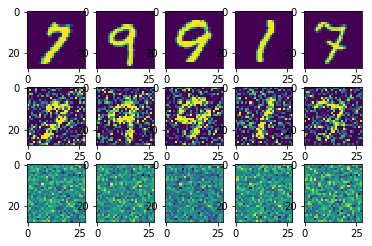

0.10402628


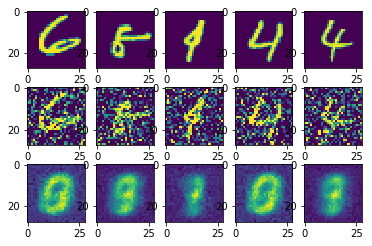

0.09966806


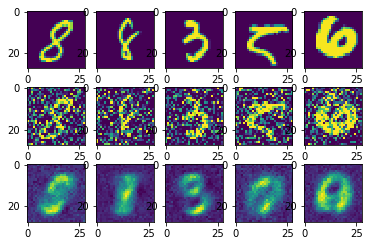

0.09362671


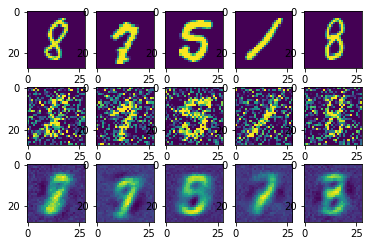

0.0932743


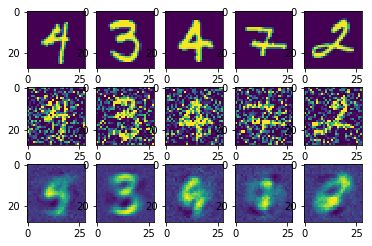

0.092671156


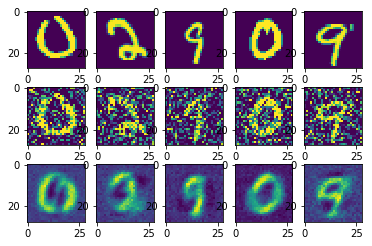

0.09090796


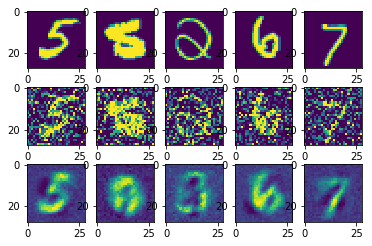

0.090462595


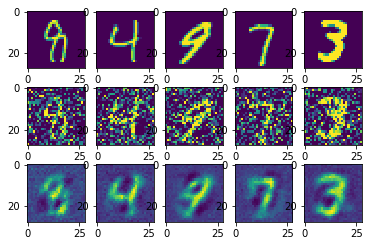

0.08856332


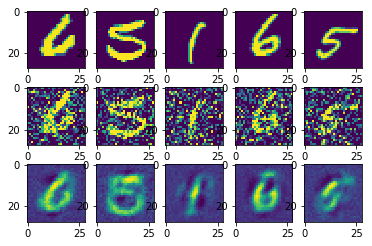

0.088313825


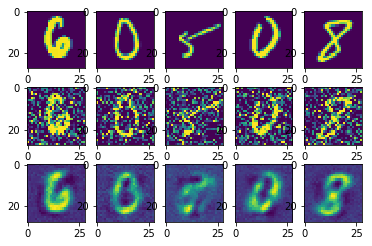

0.0863152


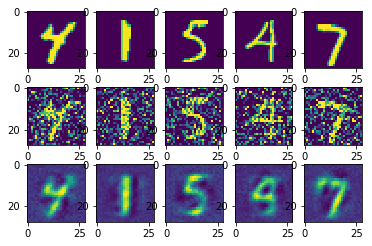

0.087046884


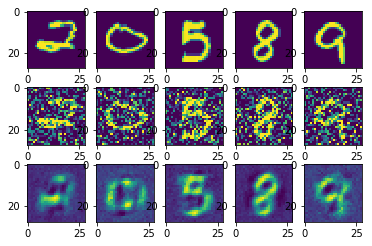

0.08641636


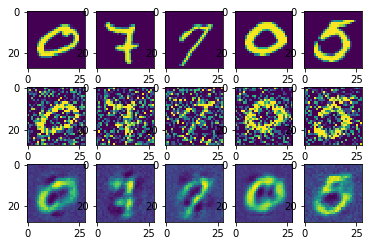

0.08795477


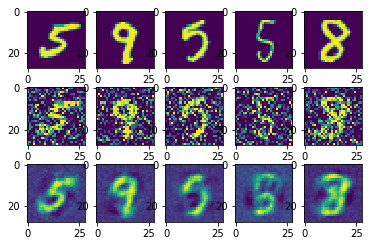

0.084336445


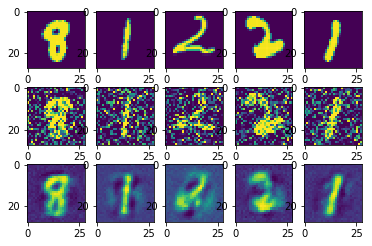

0.088110544


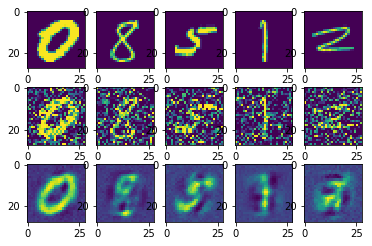

0.08843763


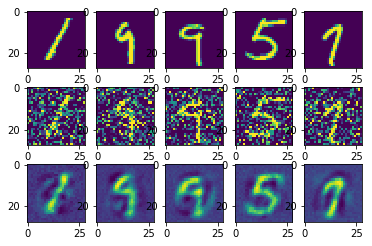

0.08751133


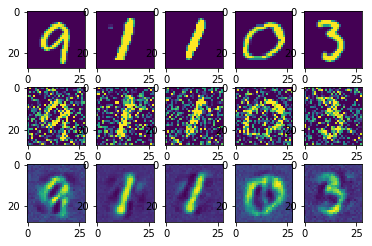

0.08452196


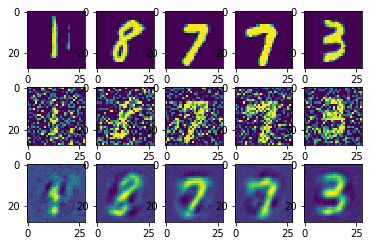

0.08592807


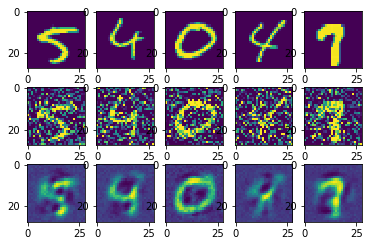

In [11]:
#自编码器的输入与输出要求一致
with tf.Graph().as_default() as g:
    inp_out = tf.placeholder(shape=[None,784],dtype=tf.float32)
    #keep_prob = tf.placeholder(tf.float32)
    #d = tf.nn.dropout(inp_out,keep_prob)
    h = tf.keras.layers.Dense(32,activation=tf.nn.relu)(inp_out)
    h1 = tf.keras.layers.Dense(64,activation=tf.nn.relu)(h)
    h2 = tf.keras.layers.Dense(128,activation=tf.nn.relu)(h1)
    out = tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h2)#线性激活函数可不用填写,但为了更快收敛，加一个sigmoid函数
    
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out,out))
    #模型保存
    #saver = tf.train.Saver()
    
with tf.Session(graph=g) as sess:
    optim = tf.train.GradientDescentOptimizer(learning_rate=2.5)
    tran_op = optim.minimize(loss)  #最小化代价
    sess.run(tf.global_variables_initializer())
    
    for i in range(20000):
        batch_images, _ = mnist.train.next_batch(32)
            
        #加入白噪声
        noise_factor = 0.5
        batch_images_noisy = batch_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=batch_images.shape)
        #区间剪切，超过区间会被转成区间极值
        batch_images_noisy = np.clip(batch_images_noisy, 0., 1.)
        
        res_loss, _ = sess.run(
            [loss, tran_op],
            feed_dict={inp_out: batch_images_noisy})
        if i % 1000 == 0:
            print(res_loss)
            
            res_out = sess.run(
                out, feed_dict={inp_out: batch_images_noisy})
            
            for j in range(15):
                plt.subplot(3, 5, j+1)  #三行五列
                if j < 5:
                    img = batch_images[j] 
                elif j < 10:
                    img = batch_images_noisy[j - 5]
                else:
                    img = res_out[j - 10]
                img = ((img * 255).astype(np.uint8).reshape([28, 28]))
                plt.imshow(img)
            plt.show()